# Folium Demo
http://folium.readthedocs.io/en/latest/

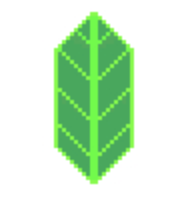

**Python Data. Leaflet.js Maps.**


Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.


**Concepts**


Folium makes it easy to visualize data thatâ€™s been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.


The library has a number of built-in tilesets from 
- OpenStreetMap, 
- Mapbox, and 
- Stamen, 

and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

### About this ipynb

**The purpose of this ipnyb (interactive python notebook) is:** to demonstrate how to use the folium library to visualize geogrpahic data.


Format of the notebook:
- Import libraries
- Install folium
- Load data
- Cursory exploration of the data
- Use folium to generate visualizations

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
% matplotlib inline 

# %matplotlib inline sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends 
# like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.

In [2]:
import folium

The installation requirements and methods can be found here:


http://folium.readthedocs.io/en/latest/installing.html#requirements

In [3]:
import time

In [4]:
start_time = time.time()

!pip install folium
# in jupyter, !pip install <library or package name> 

print('It only takes approximately {} seconds!'.format(time.time() - start_time))

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
It only takes approximately 1.1645712852478027 seconds!


In [5]:
import folium

In [6]:
from dateutil import parser
from datetime import datetime, timedelta

In [7]:
import json

### Load Data

In [8]:
pwd

'/home/jovyan'

Import your data from the respective directory that you have it saved.

In [9]:
# import data 
data = pd.read_csv('./cellmetadata.csv')

In [10]:
data.head(5)

Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   
3  505010153111F         HAYMARKET #   
4      5.05E+106         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   
3  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 13:13     Phone   
4  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 17:27     Phone   

    Latitude   Longitude  
0 -33.892933  151.202296  
1 -33.892933  151.202296  
2 -33.880329  151.205690  
3 -33.880329  151.205690  
4 -33.880329  151.205690

### Data Dictionary Summary Table:
| Field Name | Description | 
| --- | --- |
| Cell CGI | cell phone tower identifier |
| Cell Tower | cell phone tower location |
| Comm Identifier | redacted recipient of communication |
| Comm Timedate String | time of communication | 
| Comm Type | type of communication | 
| Latitude | latitude of communication | 
| Longitude | longitude of communication |

### Cursory Exploration of the Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [12]:
data.describe().T

count        mean       std         min         25%        50%  \
Latitude   10476.0  -35.136188  3.141723  -42.884810  -33.884603  -33.79661   
Longitude  10476.0  150.612841  1.470169  144.848243  151.202296  151.26654   

                 75%        max  
Latitude   -33.78815  -33.55731  
Longitude  151.26654  151.28934

Sometimes it's helpful to take a quick `.value_counts()` to get a sense of the data.
Additionally, it might prove helpful to generate some standard visualizations such as (where applicable):
- histograms and/or distribution plots
- scatter and/or boxplots

In [13]:
data['Comm Type'].unique()

array(['Phone', 'SMS', 'Internet'], dtype=object)

In [14]:
data["Comm Type"].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

There are 3 unique communication types:
1. Internet
2. Phone
3. SMS

In [15]:
data['Cell Tower Location'].nunique()

71

There are 71 unique cell tower locations (as shown by the code below)

In [18]:
# top 10 locations by count
data['Cell Tower Location'].value_counts()[:10]

BALGOWLAH HAYES ST         4301
CHIPPENDALE                1084
SUNDERLAND ST               723
REDFERN TE                  712
HAYMARKET #                 563
BRICKWORKS                  501
HARBORD 22 WAINE ST         465
FAIRLIGHT 137 SYDNEY RD     454
MANLY #                     231
NEW TOWN                    197
Name: Cell Tower Location, dtype: int64

In [ ]:
plt.figure(figsize = (30, 15))
_ = data['Cell Tower Location'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Cell Tower Locations')
plt.xticks(rotation=90)
plt.show()

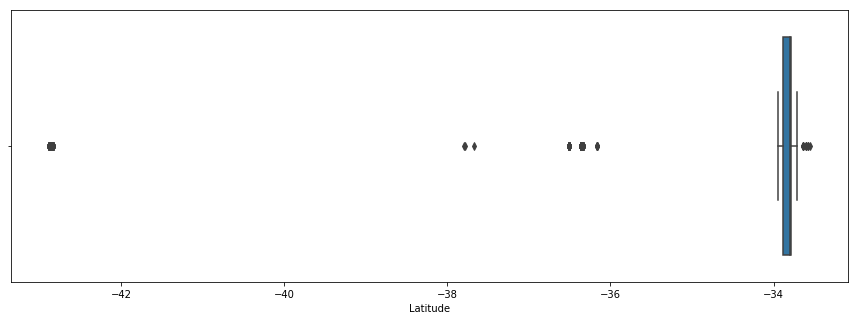

In [20]:
plt.figure(figsize=(15, 5))
_ = sns.boxplot(data['Latitude'])

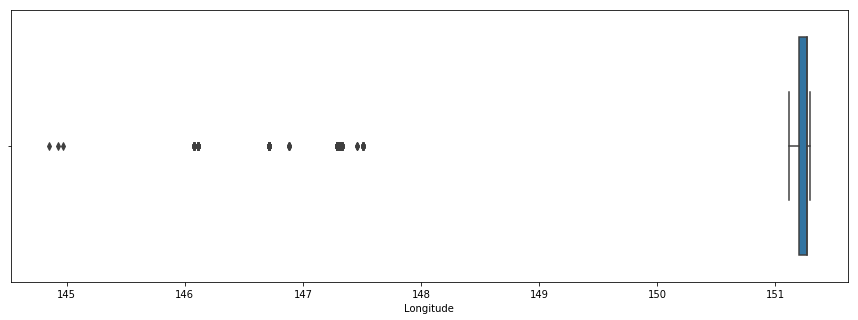

In [21]:
plt.figure(figsize=(15, 5))
_ = sns.boxplot(data['Longitude'])

### Visualizing Latitude & Longitude
- Using scatter plots to visualize coordinates
- Using folium to visualize coordinates

In [22]:
# scatter plot

# plt.figure(figsize=(13, 7))
# _ = plt.scatter(data['Latitude'], data['Longitude'])
# plt.title('Latitude Longitude Scatter Plot')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.show()

### Data Prep for Visualizing with folium

In [27]:
coordinates = list(zip(data['Latitude'], data['Longitude']))
data['coordinates'] = coordinates

In [28]:
data.head()

Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   
3  505010153111F         HAYMARKET #   
4      5.05E+106         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   
3  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 13:13     Phone   
4  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 17:27     Phone   

    Latitude   Longitude                         coordinates  
0 -33.892933  151.202296  (-33.89293336, 151.20229619999998)  
1 -33.892933  151.202296  (-33.89293336, 151.20229619999998)  
2 -33.880329  151.205690         (-33.88032891, 151.2056904)  
3 -33.880329  151.205690         (-33.88032891, 151.2056904)  
4 -33.880329  151.205690         (-33.88032891, 151.2056904)

### Let's look at the top 5 locations
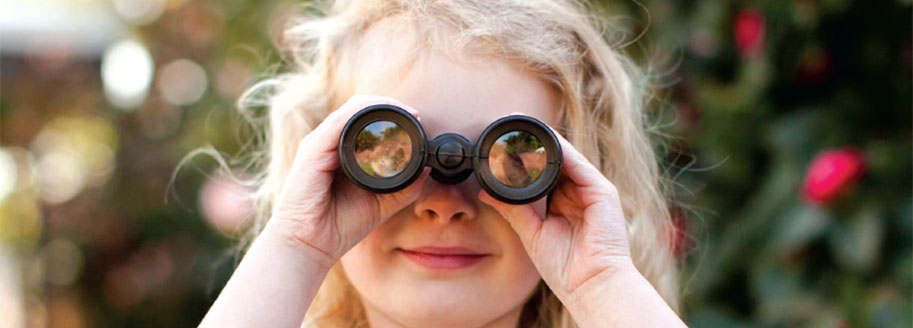

In [31]:
# grab the top 5 locations that this paritcular cell phone user frequents based on the latitude/longitude pairings
top_5_locations = data['coordinates'].value_counts()[:5]
top_5_locations

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
Name: coordinates, dtype: int64

In [33]:
# masking in pandas
top_location_mask = data['coordinates'] == top_5_locations.index[0]

In [62]:
data[top_location_mask].shape

(4301, 13)

In [35]:
data[data['coordinates'] == (top_5_locations.index[0])].head()

Cell Cgi Cell Tower Location Comm Identifier Comm Timedate String  \
715  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 17:17   
716  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:08   
717  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:08   
718  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:09   
719  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:10   

    Comm Type  Latitude  Longitude             coordinates  
715  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
716  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
717  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
718  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
719  Internet -33.78815  151.26654  (-33.78815, 151.26654)

_____________

### Where is our cell phone user located?

**Let's look at the location that this particular cell phone user frequents the most and unveil the mystery of where they're located!**

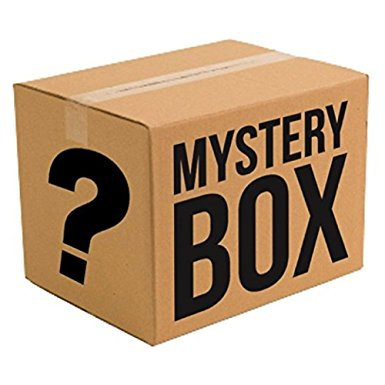

In [36]:
mfLat = -33.78815
mfLon = 151.26654

# map format Open Street Format
map_osm = folium.Map(location=[mfLat, mfLon])

In [37]:
map_osm

### Let's get Amelie creepy ....
#### (...yes, Amelie is creepy)
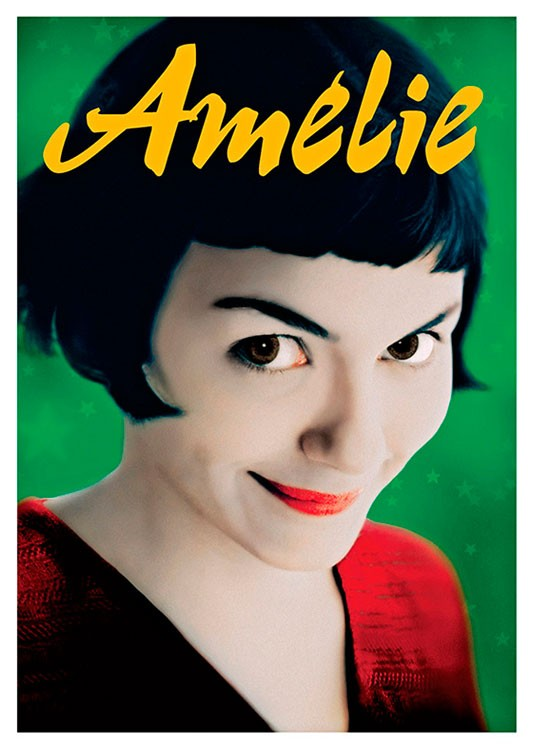

In [38]:
# let's set the default zoom for when it loads
map_osm = folium.Map(location =[mfLat, mfLon], zoom_start = 30)
map_osm

Init signature: folium.Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon')
Docstring:     
Creates an Icon object that will be rendered
using Leaflet.awesome-markers.

Parameters
----------
- **color** : str, default 'blue'


    The color of the marker. You can use:

        ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']

- **icon_color** : str, default 'white'


    The color of the drawing on the marker. You can use colors above, or an html color code.
    
    
- **icon** : str, default 'info-sign'
    
    
    The name of the marker sign. See Font-Awesome website to choose yours. 
    Warning : depending on the icon you choose you may need to adapt the `prefix` as well.
    
    
- **angle** : int, default 0


    The icon will be rotated by this amount of degrees.


- **prefix** : str, default 'glyphicon'
    The prefix states the source of the icon. 'fa' for font-awesome or 'glyphicon' for bootstrap 3.

In [39]:
folium.Marker()

TypeError: __init__() missing 1 required positional argument: 'location'

In [40]:
top_5_locations.index

Index([                   (-33.78815, 151.26654),
                       (-33.88417103, 151.20235),
       (-42.843379999999996, 147.29568999999998),
              (-33.89293336, 151.20229619999998),
                     (-33.88032891, 151.2056904)],
      dtype='object')

In [41]:
# let's make some assumptions

map_osm1 = folium.Map(location=top_5_locations.index[0])

folium.Marker(location=top_5_locations.index[0], popup='home?', 
              icon=folium.Icon(icon='home')).add_to(map_osm1)

folium.Marker(location=top_5_locations.index[1], popup='work?', 
              icon=folium.Icon(icon='briefcase', 
                               color='darkred')).add_to(map_osm1)

map_osm1

In [42]:
# write a function to add markers:

def add_marker (location, your_map, icon_label=None, icon_color='blue', icon='info-sign'):
    folium.Marker(location=location, popup=icon_label, \
                  icon=folium.Icon(icon=icon, color=icon_color)).add_to(your_map)
    return your_map

In [43]:
add_marker(top_5_locations.index[2], map_osm1)

### Cursory analysis of the datetime information

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 8 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
coordinates             10476 non-null object
dtypes: float64(2), object(6)
memory usage: 654.8+ KB


In [45]:
type(data['Comm Timedate String'][0])

str

In [47]:
data['Comm Timedate String'][0]

'4/1/14 9:40'

In [48]:
test_dt = parser.parse(data['Comm Timedate String'][0])
test_dt

datetime.datetime(2014, 4, 1, 9, 40)

In [49]:
data['datetime'] = [parser.parse(element) for element in data['Comm Timedate String']]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 9 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
coordinates             10476 non-null object
datetime                10476 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 736.7+ KB


In [51]:
data['year'] = [element.year for element in data['datetime']]
data['month']= [element.month for element in data['datetime']]

In [52]:
data['time'] = [datetime.time(element) for element in data['datetime']]
data['date'] = [datetime.date(element) for element in data['datetime']]

In [53]:
data.head(3)

Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   

    Latitude   Longitude                         coordinates  \
0 -33.892933  151.202296  (-33.89293336, 151.20229619999998)   
1 -33.892933  151.202296  (-33.89293336, 151.20229619999998)   
2 -33.880329  151.205690         (-33.88032891, 151.2056904)   

             datetime  year  month      time        date  
0 2014-04-01 09:40:00  2014      4  09:40:00  2014-04-01  
1 2014-04-01 09:42:00  2014      4  09:42:00  2014-04-01  
2 2014-04-01 13:13:00  2014      4  13:13:00  2014-04-01

In [55]:
data[data['coordinates']==top_5_locations.index[2]]['date'].unique()

array([datetime.date(2014, 5, 2), datetime.date(2014, 5, 4),
       datetime.date(2014, 8, 11), datetime.date(2014, 11, 12),
       datetime.date(2014, 11, 13), datetime.date(2014, 11, 14),
       datetime.date(2014, 11, 15), datetime.date(2014, 12, 20),
       datetime.date(2014, 12, 21), datetime.date(2014, 12, 22),
       datetime.date(2014, 12, 23), datetime.date(2014, 12, 24),
       datetime.date(2014, 12, 25), datetime.date(2014, 12, 26)], dtype=object)

### What would you infer about this data given the dates shown above?

### VACATION Destination ...?
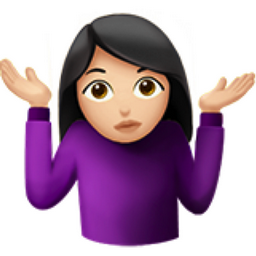

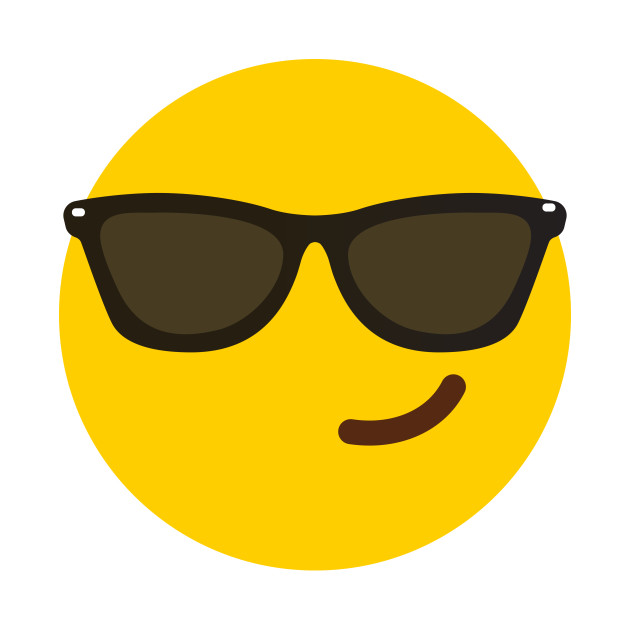

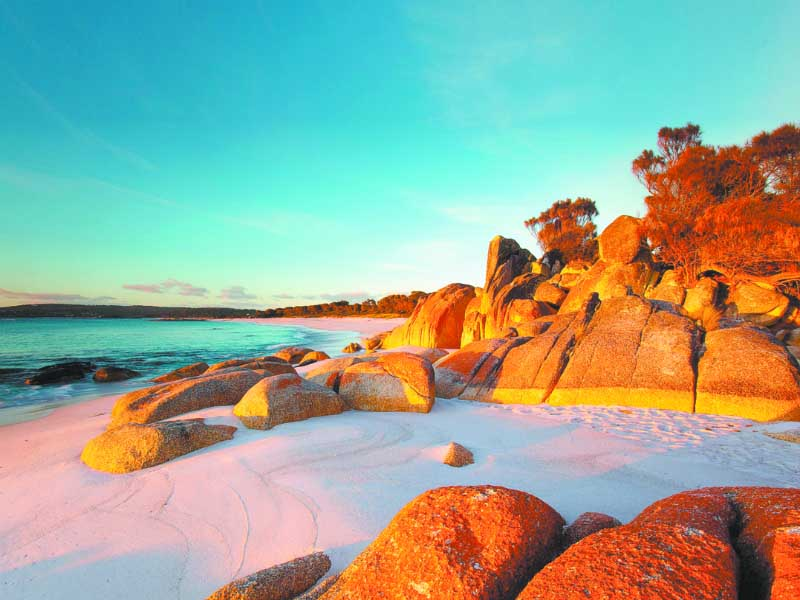

### SO! 



### Let's get fancy with our icons!
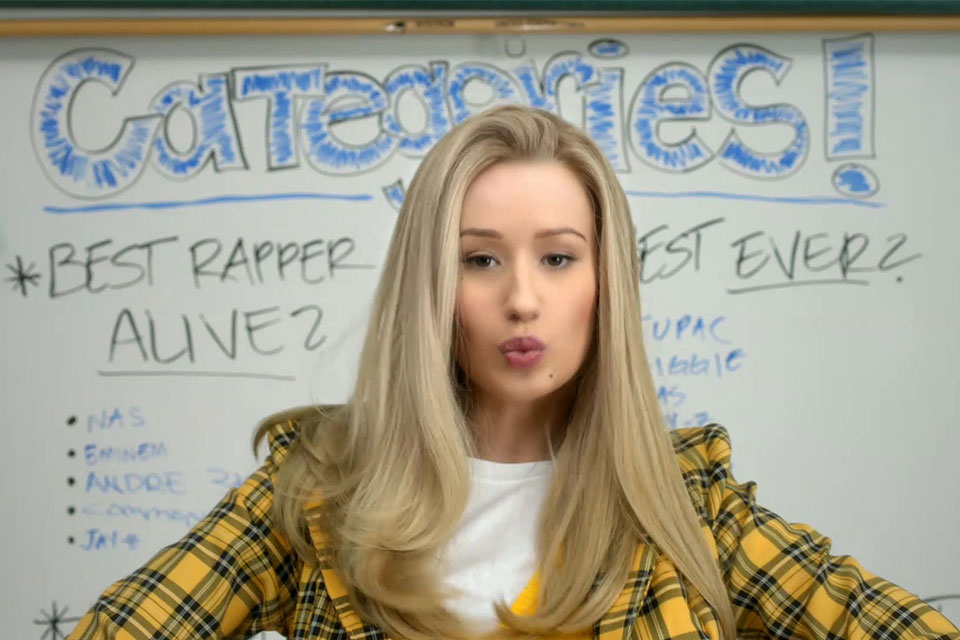

In [56]:
top_5_locations

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
Name: coordinates, dtype: int64

In [57]:
map_terrain = folium.Map(location=top_5_locations.index[0], tiles='Stamen Terrain', \
                         zoom_start=13)

add_marker(location=top_5_locations.index[0], your_map=map_terrain, icon='home')

add_marker(location=top_5_locations.index[1], your_map=map_terrain, icon='briefcase', \
           icon_color='darkred')

In [58]:
from folium.features import CustomIcon

In [59]:
# write function for setting an icon
def set_custom_icon (icon_image):
    icon_var = CustomIcon(
        icon_image, 
        icon_size=(38,38),
        icon_anchor=(22,94),
        popup_anchor=(-3,-76)
    )
    return icon_var

In [60]:
# write function for setting a custom marker
def set_custom_marker (my_location, custom_set_icon, label):
    marker = folium.Marker(location=my_location, icon=custom_set_icon, popup=label)
    return marker

In [61]:
m = folium.Map(location=top_5_locations.index[0], tiles='Stamen Terrain')

url = 'https://png.icons8.com/color/50/000000/{}'.format
home_image = url('home.png')
work_image = url('permanent-job.png')
vacation_image = url('beach.png')

home_icon = set_custom_icon(home_image)
work_icon = set_custom_icon(work_image)
vaca_icon = set_custom_icon(vacation_image)

home_marker = set_custom_marker(top_5_locations.index[0], home_icon, label='Home Sweet Home')
work_marker = set_custom_marker(top_5_locations.index[1], work_icon, label='Not This Again...')
vaca_marker = set_custom_marker(top_5_locations.index[2], vaca_icon, label='Finally!')

m.add_child(home_marker)
m.add_child(work_marker)
m.add_child(vaca_marker)

m

# Other Examples!

http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/